PERFORMANCE RATING MODEL

NOTE:

*   Preprocessing steps (dropping columns, removing trailing spaces, boxplots and outliers capping have been done already during attrition)
*   The cleaned data has been saved and here we are continuing with the cleaned data)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_excel('/content/drive/My Drive/cleaned_employee_attrition.xlsx')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8.0,0,1,6,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10.0,3,3,10,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7.0,3,3,0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8.0,3,3,8,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6.0,3,3,2,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17.0,3,3,5,2.0,0.0,3.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9.0,5,3,7,7.0,1.0,7.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6.0,0,3,6,2.0,0.0,3.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17.0,3,2,9,6.0,0.0,8.0


In [ ]:
df['PerformanceRating'].value_counts()

,count
PerformanceRating,
3,1244
4,226


EXPLORATORY DATA ANALYSIS - PERFORMANCE RATING (TARGET)

ACTUAL CONTINUOUS NUMERICAL COLUMNS

In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_but_categorical = [col for col in numeric_cols if df[col].nunique() <= 10]
continuous_numeric = [col for col in numeric_cols if col not in numeric_but_categorical]
print("Continuous Numeric Columns:")
print(continuous_numeric)

Continuous Numeric Columns:
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


NUMERIC COLUMNS BUT ACTUALLY CATEGORICAL

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_but_categorical = [col for col in numeric_cols if df[col].nunique() <= 10]
print("Numeric but Categorical Columns:")
print(numeric_but_categorical)

Numeric but Categorical Columns:
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion']


ANALYSING SKEWNESS AFTER CAPPING OUTLIERS - ONLY CONTINUOUS NUMERICAL COLUMNS

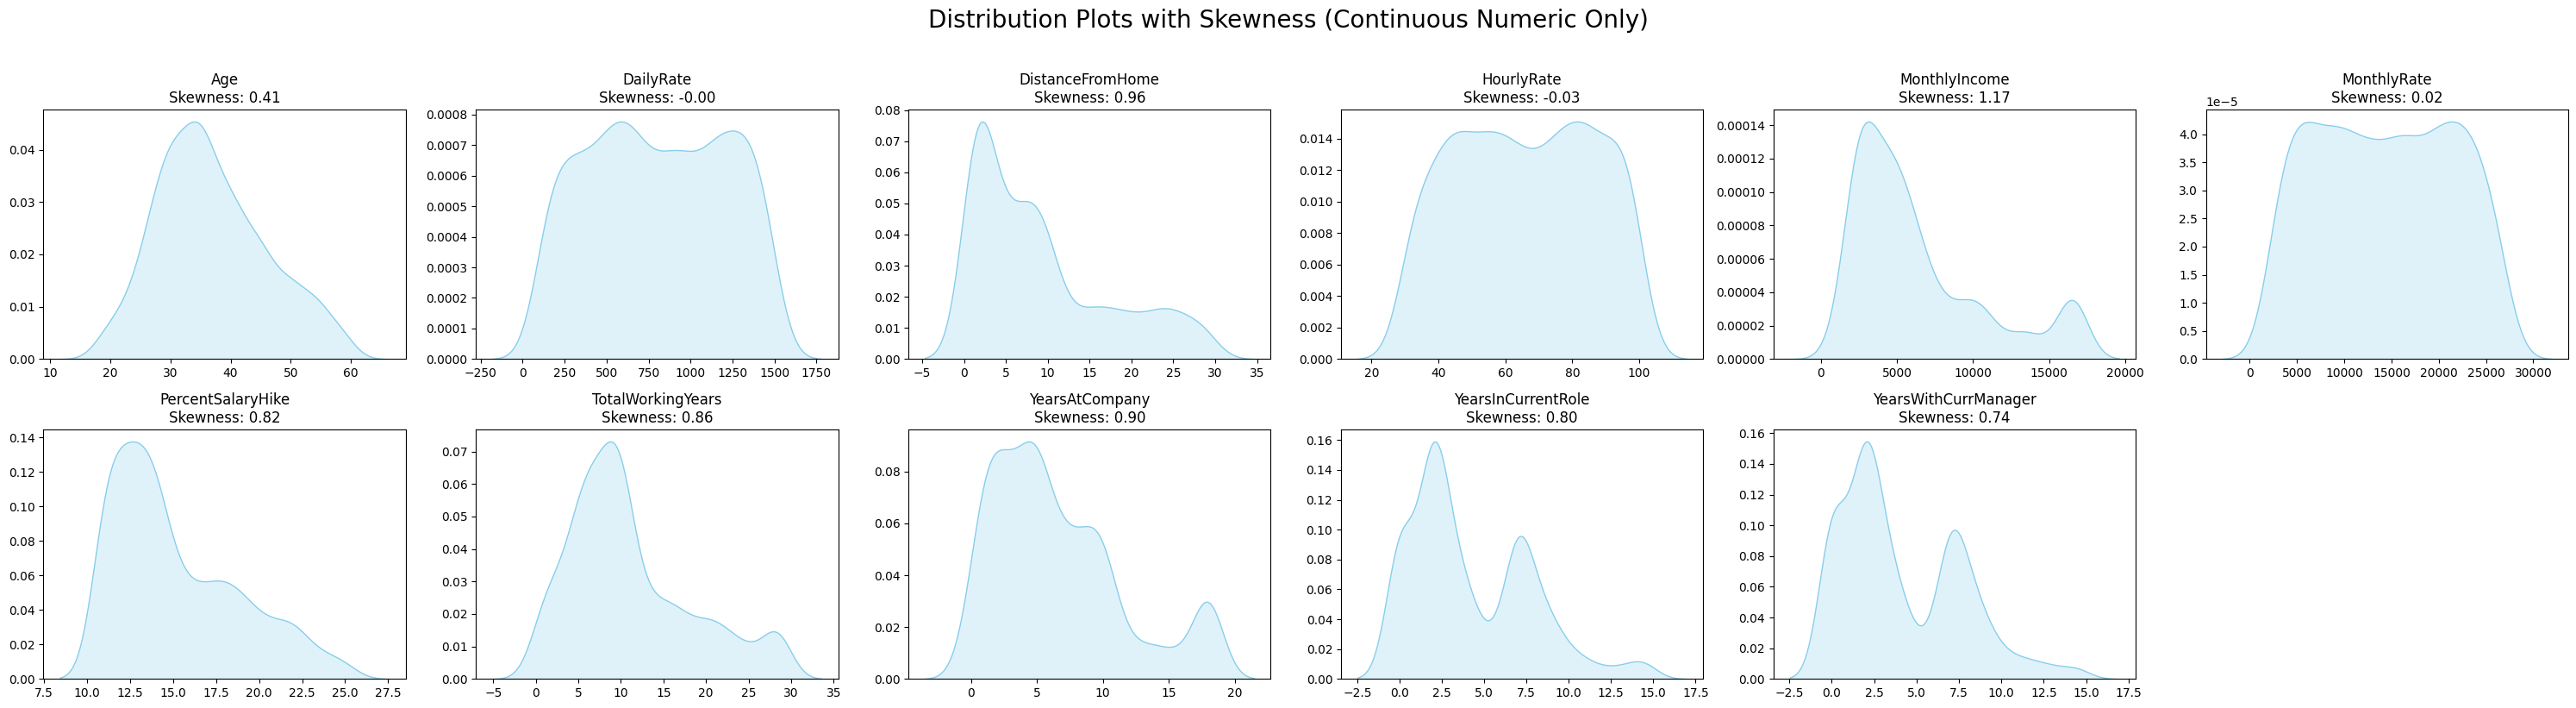

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

all_numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

likely_categorical = [col for col in all_numeric_cols if df[col].nunique() <= 10]

continuous_numeric = [col for col in all_numeric_cols if col not in likely_categorical]

num_plots = len(continuous_numeric)
cols = 6
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))
plt.suptitle("Distribution Plots with Skewness (Continuous Numeric Only)", fontsize=20, y=1.02)

for i, col in enumerate(continuous_numeric):
  plt.subplot(rows, cols, i + 1)
  sns.kdeplot(data=df, x=col, fill=True, color='skyblue')
  skew_val = df[col].skew()
  plt.title(f'{col}\nSkewness: {skew_val:.2f}')
  plt.xlabel('')
  plt.ylabel('')
  plt.tight_layout()
plt.show()

UNIVARIATE ANALYSIS - NUMERIC BUT CATEGORICAL COLUMNS

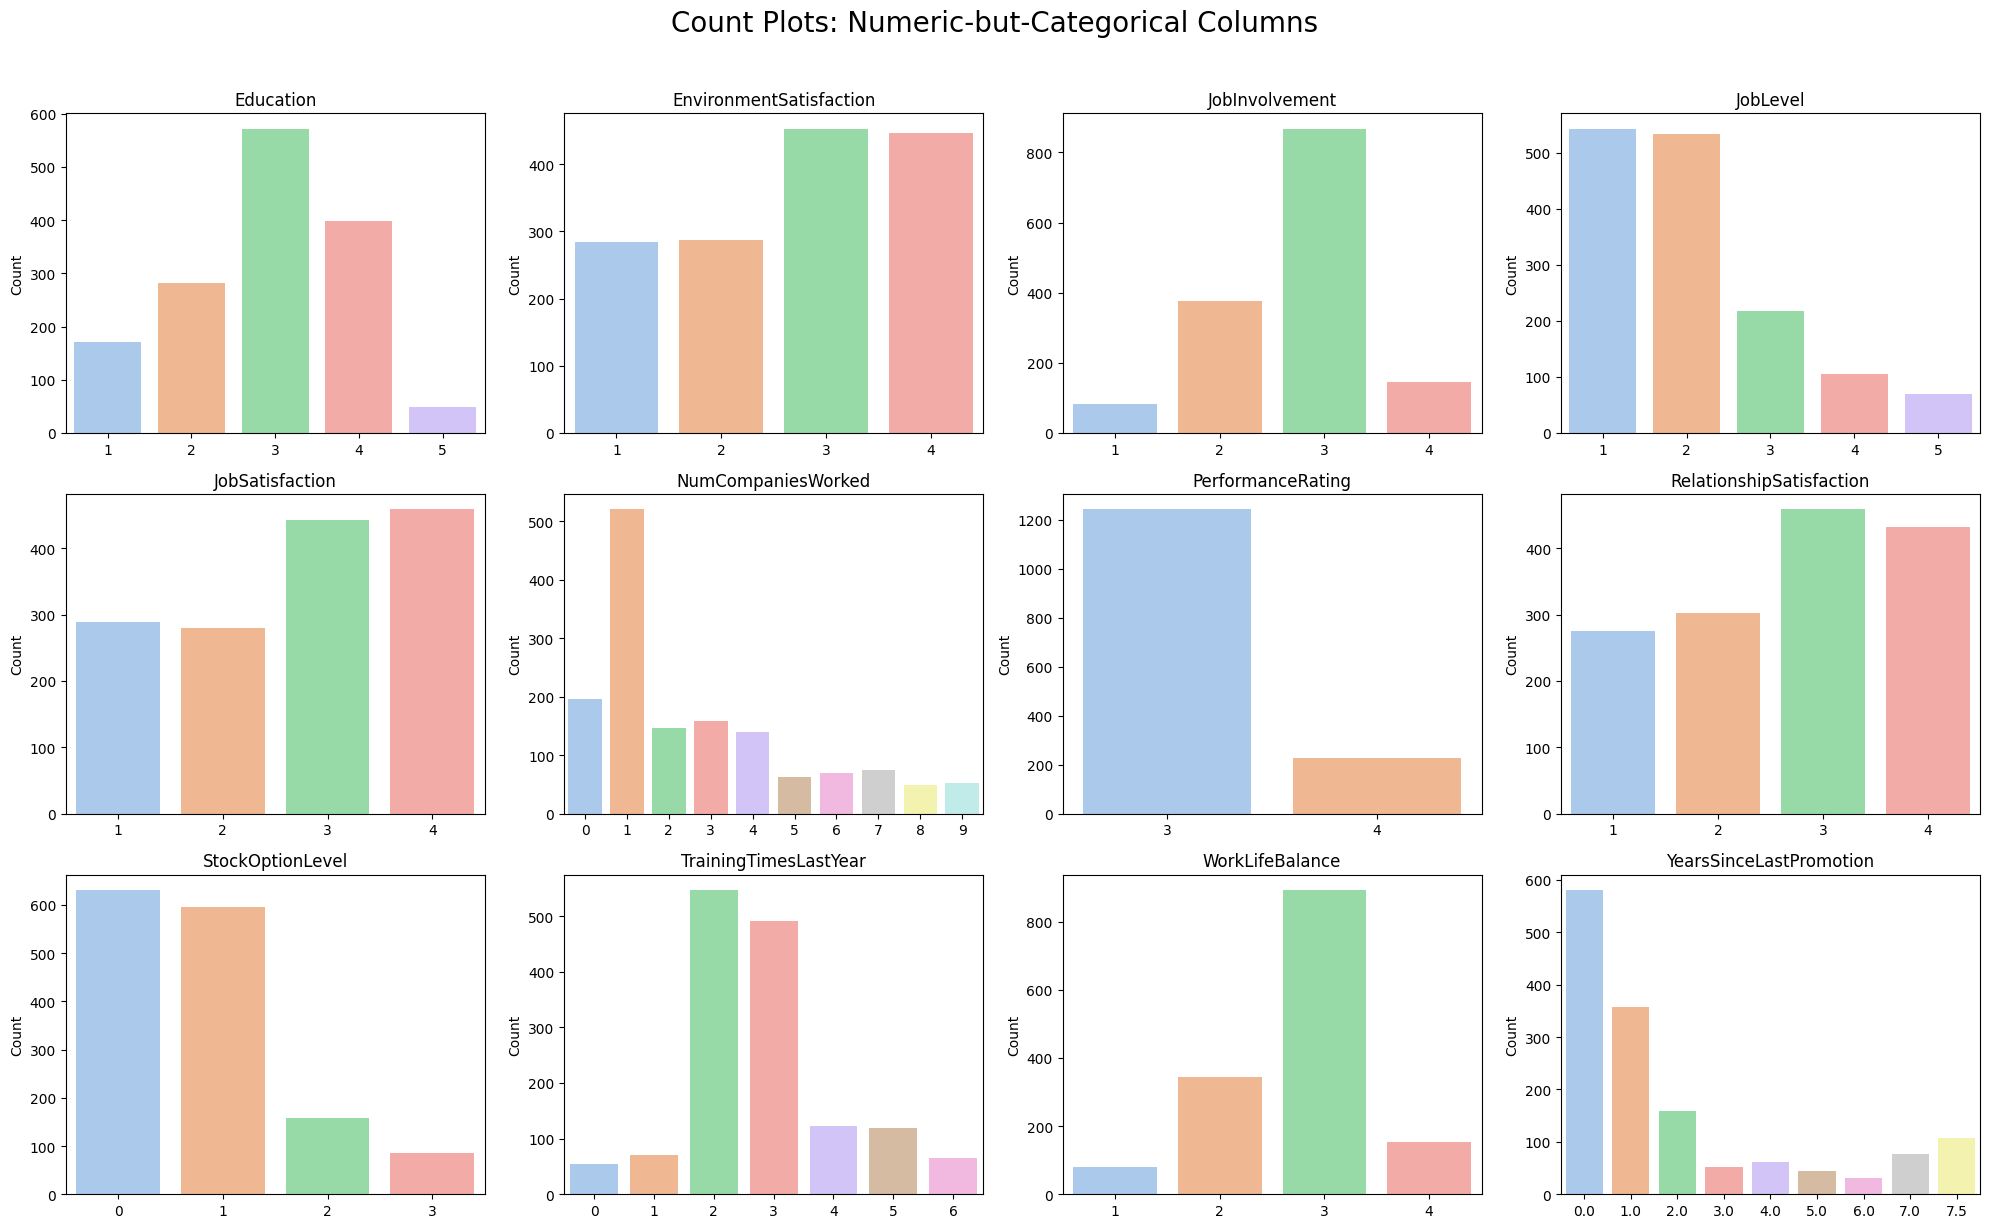

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_but_categorical = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() <= 10]

num_plots = len(numeric_but_categorical)
cols = 4
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))
plt.suptitle("Count Plots: Numeric-but-Categorical Columns", fontsize=20, y=1.02)

for i, col in enumerate(numeric_but_categorical):
  plt.subplot(rows, cols, i + 1)
  sns.countplot(data=df, x=col, palette='pastel')
  plt.title(col)
  plt.xlabel('')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.tight_layout()
plt.show()

UNIVARIATE ANALYSIS FOR REAL CATEGORICAL COLUMNS

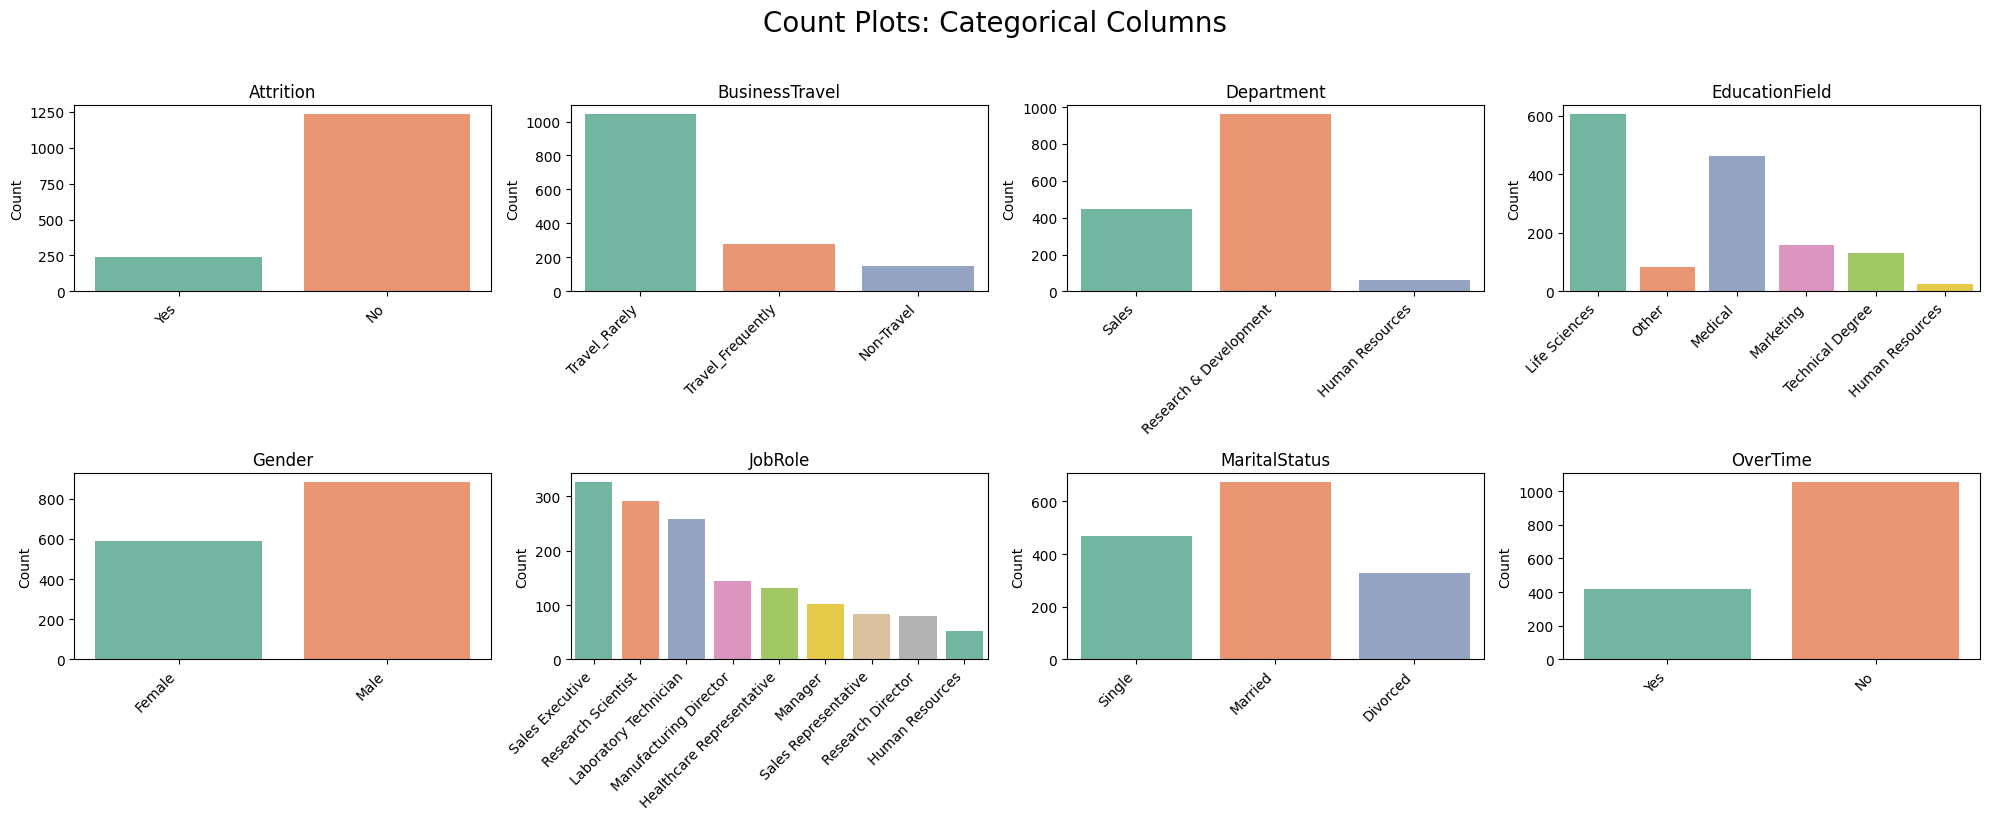

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = 4

categorical_cols = df.select_dtypes(include='object').columns.tolist()

num_plots = len(categorical_cols)
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))
plt.suptitle("Count Plots: Categorical Columns", fontsize=20, y=1.02)

for i, col in enumerate(categorical_cols):
  plt.subplot(rows, cols, i + 1)
  sns.countplot(data=df, x=col, palette='Set2')
  plt.title(col)
  plt.xlabel('')
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS - TARGET (PERFORMANCE RATING) VS. CONTINUOUS NUMERICAL COLUMNS

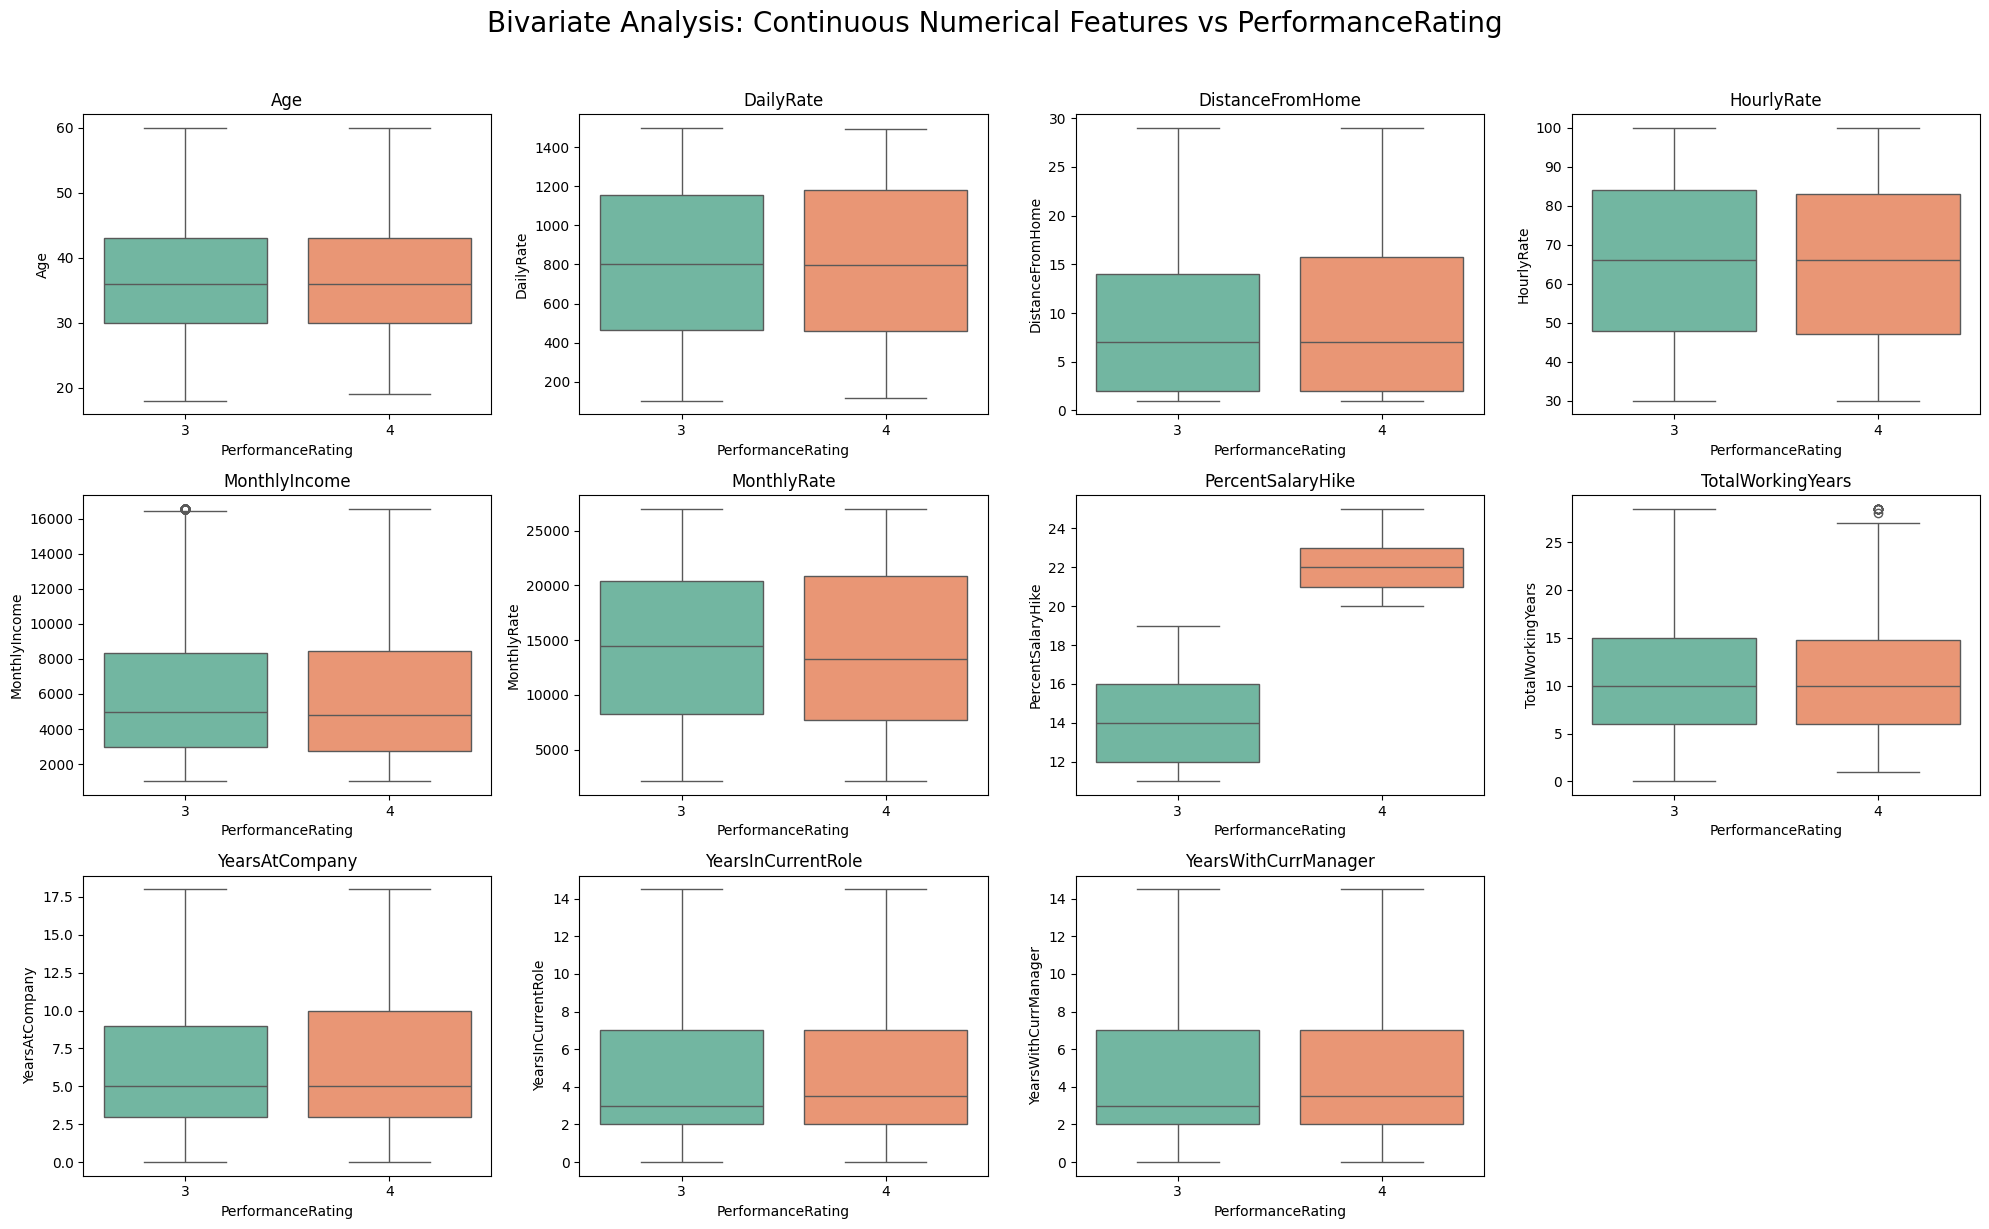

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

likely_categorical = [col for col in numeric_cols if df[col].nunique() <= 10]

continuous_numeric = [col for col in numeric_cols if col not in likely_categorical and col != 'PerformanceRating']

cols = 4
rows = (len(continuous_numeric) + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))
plt.suptitle("Bivariate Analysis: Continuous Numerical Features vs PerformanceRating", fontsize=20, y=1.02)

for i, col in enumerate(continuous_numeric):
  plt.subplot(rows, cols, i + 1)
  sns.boxplot(data=df, x='PerformanceRating', y=col, palette='Set2')
  plt.title(col)
  plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS - TARGET (PERFORMANCE RATING) VS. NUMERIC BUT CATEGORICAL COLUMNS

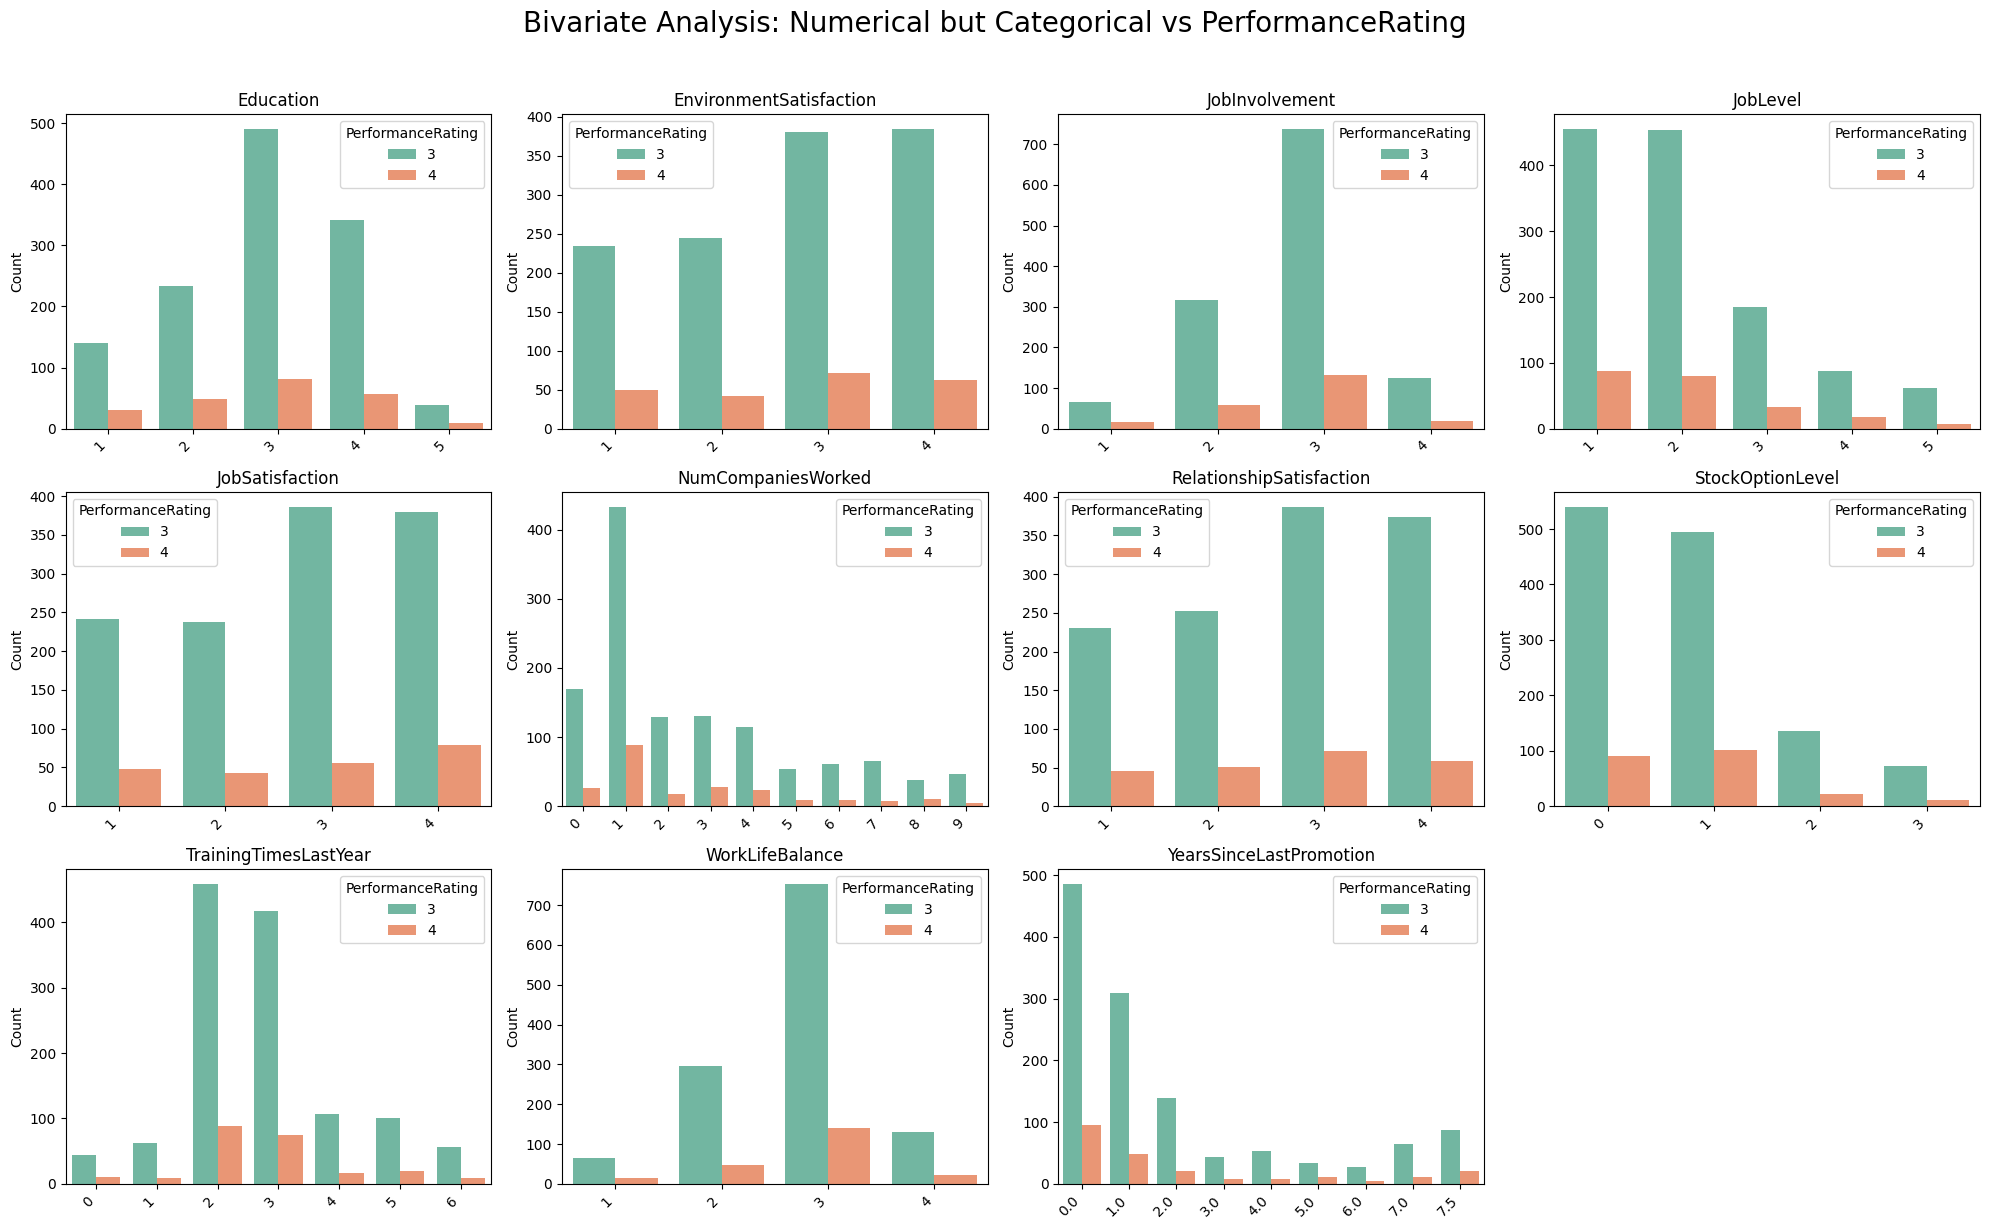

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_but_categorical = [col for col in numeric_cols if df[col].nunique() <= 10 and col != 'PerformanceRating']

cols = 4
rows = (len(numerical_but_categorical) + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))
plt.suptitle("Bivariate Analysis: Numerical but Categorical vs PerformanceRating", fontsize=20, y=1.02)

for i, col in enumerate(numerical_but_categorical):
  plt.subplot(rows, cols, i + 1)
  sns.countplot(data=df, x=col, hue='PerformanceRating', palette='Set2')
  plt.title(col)
  plt.xlabel('')
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

plt.show()

BIVARIATE ANALYSIS - TARGET (PERFORMANCE RATING) VS. REAL CATEGORICAL COLUMNS

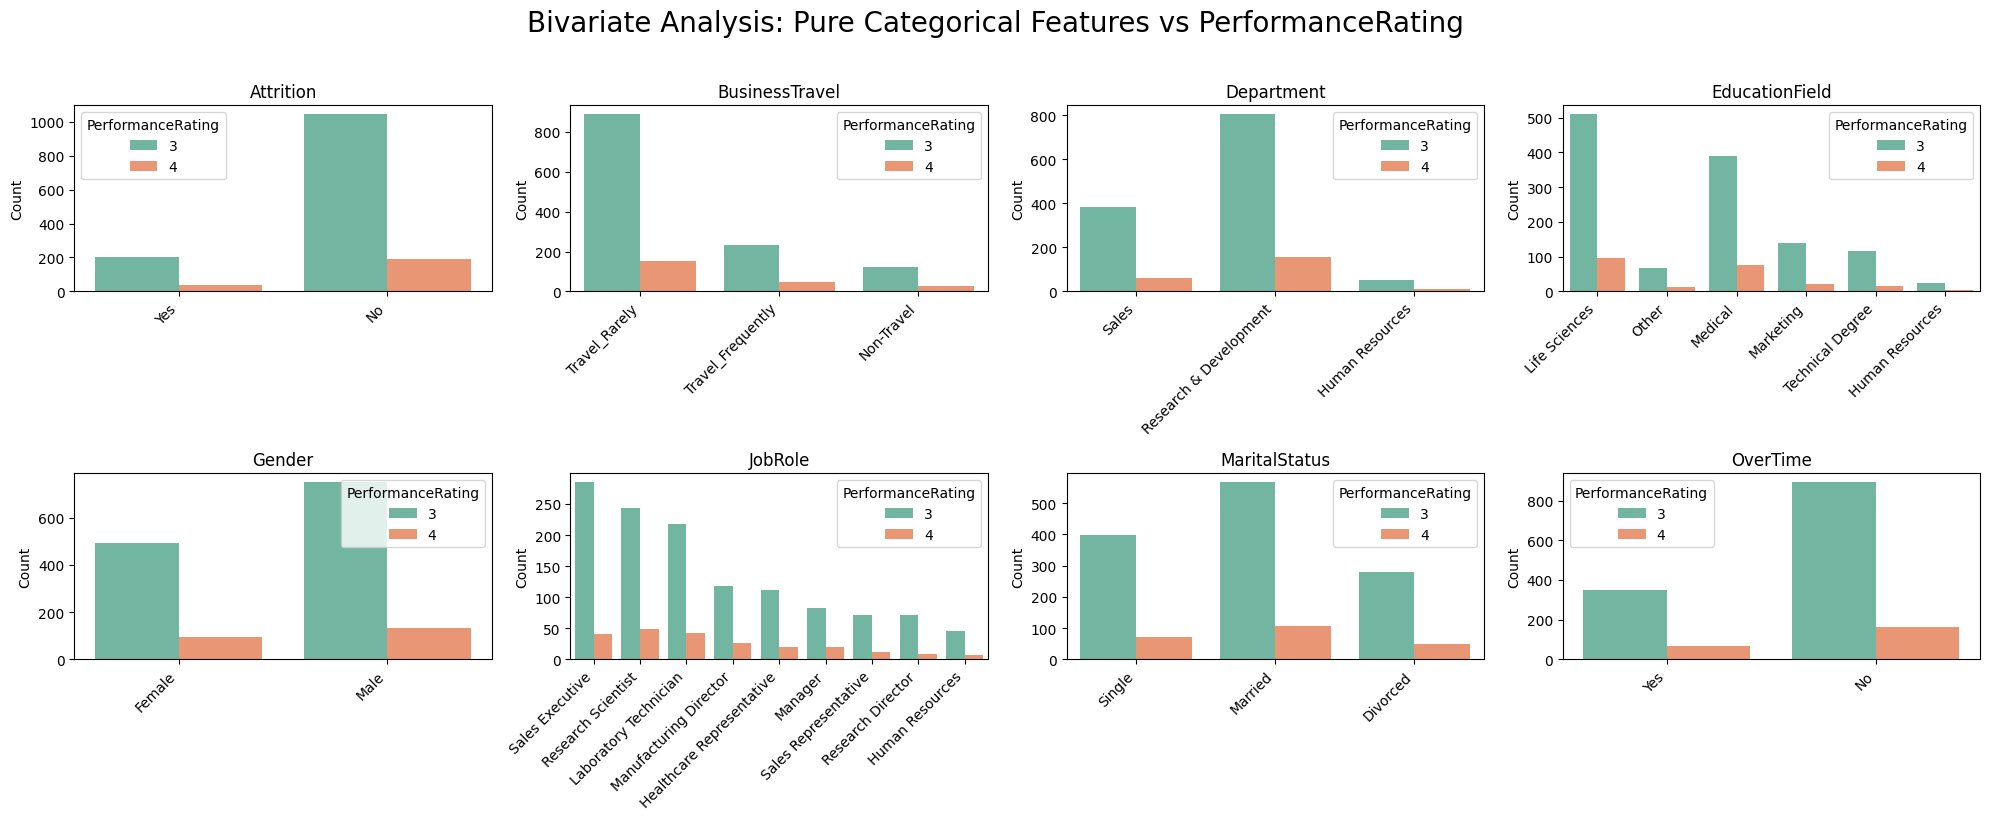

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pure_categorical_cols = df.select_dtypes(include='object').columns.tolist()

cols = 4
rows = (len(pure_categorical_cols) + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))
plt.suptitle("Bivariate Analysis: Pure Categorical Features vs PerformanceRating", fontsize=20, y=1.02)

for i, col in enumerate(pure_categorical_cols):
  plt.subplot(rows, cols, i + 1)
  sns.countplot(data=df, x=col, hue='PerformanceRating', palette='Set2')
  plt.title(col)
  plt.xlabel('')
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
plt.show()

CHI SQUARE TEST FOR CATEGORICAL COLUMNS TO CHECK DEPENDENCY ON PERFORMANCE RATING

In [ ]:
from scipy.stats import chi2_contingency

chi2_results = []
pure_categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in pure_categorical_cols:
  contingency_table = pd.crosstab(df[col], df['PerformanceRating'])
  chi2, p, dof, ex = chi2_contingency(contingency_table)
  chi2_results.append({'Feature': col, 'Chi2 Stat': chi2, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')
print(chi2_df)

          Feature  Chi2 Stat   p-value
2      Department   1.589536  0.451686
5         JobRole   7.102833  0.525580
1  BusinessTravel   1.063238  0.587653
4          Gender   0.209363  0.647267
3  EducationField   2.088647  0.836748
6   MaritalStatus   0.195798  0.906740
7        OverTime   0.007613  0.930471
0       Attrition   0.000155  0.990075


CORRELATION BETWEEN THE NUMERIC BUT CATEGORICAL COLUMNS WITH PERFORMANCE RATING

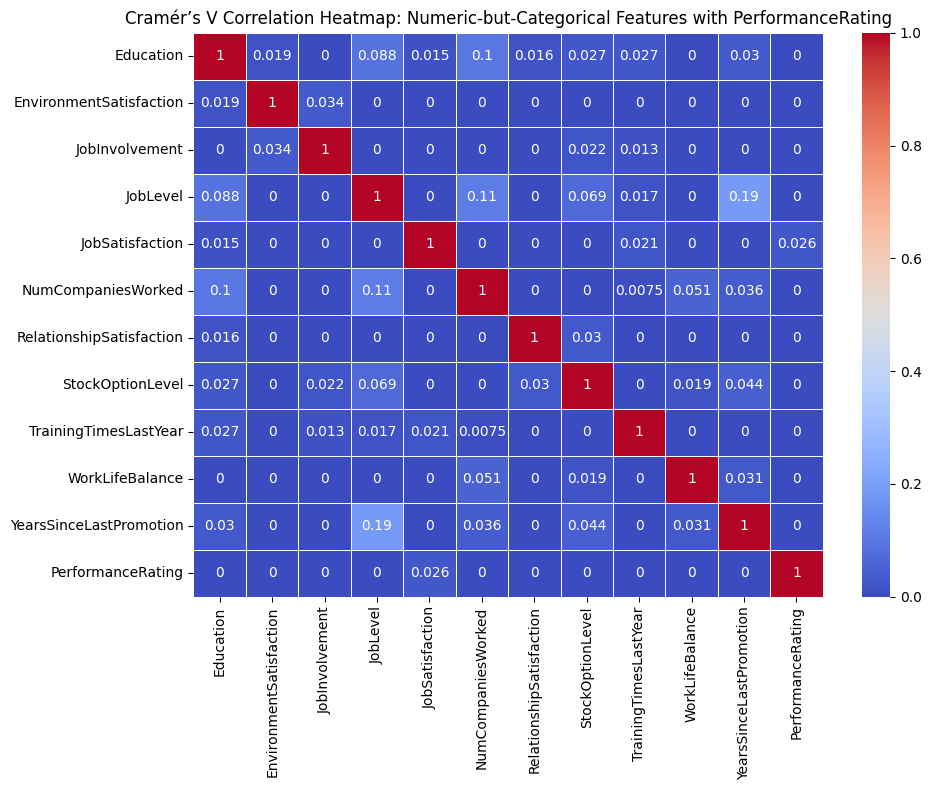

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

nbc_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() <= 10 and col != 'PerformanceRating']

nbc_cols_with_target = nbc_cols + ['PerformanceRating']

def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x, y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
  r_corr = r - ((r - 1)**2) / (n - 1)
  k_corr = k - ((k - 1)**2) / (n - 1)
  return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

cramer_matrix = pd.DataFrame(np.zeros((len(nbc_cols_with_target), len(nbc_cols_with_target))),index=nbc_cols_with_target,columns=nbc_cols_with_target)

for col1 in nbc_cols_with_target:
    for col2 in nbc_cols_with_target:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            cramer_matrix.loc[col1, col2] = 1.0

plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5)
plt.title("Cramér’s V Correlation Heatmap: Numeric-but-Categorical Features with PerformanceRating")
plt.tight_layout()
plt.show()

CORRELATION BETWEEN THE CONTINUOUS NUMERICAL COLUMNS WITH PERFORMANCE RATING

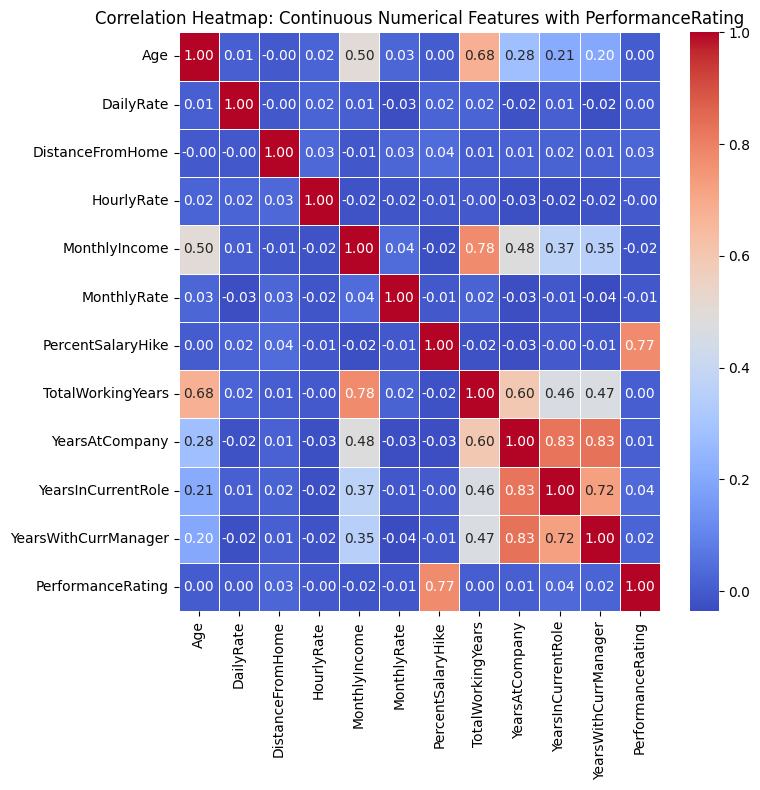

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

likely_categorical = [col for col in numeric_cols if df[col].nunique() <= 10]

continuous_numeric = [col for col in numeric_cols if col not in likely_categorical and col != 'PerformanceRating']

corr_matrix = df[continuous_numeric + ['PerformanceRating']].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Continuous Numerical Features with PerformanceRating")
plt.tight_layout()
plt.show()

In [4]:
df_encoded=df.copy()
df_encoded

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8.0,0,1,6,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10.0,3,3,10,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7.0,3,3,0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8.0,3,3,8,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6.0,3,3,2,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17.0,3,3,5,2.0,0.0,3.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9.0,5,3,7,7.0,1.0,7.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6.0,0,3,6,2.0,0.0,3.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17.0,3,2,9,6.0,0.0,8.0


ENCODING

In [5]:
df_encoded['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})
df_encoded['OverTime'] = df_encoded['OverTime'].map({'Yes': 1, 'No': 0})

In [6]:
df_encoded['Attrition'].unique()

array([1, 0])

In [7]:
df_encoded['Gender'].unique()

array([0, 1])

In [8]:
df_encoded['OverTime'].unique()

array([1, 0])

In [9]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

multi_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df_multi = df_encoded[multi_cols]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None).set_output(transform='pandas')
df_multi_encoded = ohe.fit_transform(df_multi)
df_encoded = df_encoded.drop(columns=multi_cols)
df_encoded = pd.concat([df_encoded.reset_index(drop=True), df_multi_encoded.reset_index(drop=True)], axis=1)
df_encoded

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,279,8,1,3,1,61,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,1,92,2,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,0,56,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,1,1,40,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,1,4,1,42,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,3,2,1,87,4,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,3,4,1,63,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
df_encoded.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Re

In [11]:
df_encoded.dtypes.value_counts()

,count
float64,28
int64,22


In [12]:
df_encoded.isnull().sum().sum()

np.int64(0)

FEATURE SELECTION AND BALANCING DATA

In [13]:
X=df_encoded.drop("PerformanceRating",axis=1)
y=df_encoded["PerformanceRating"]
y.value_counts()

,count
PerformanceRating,
3,1244
4,226


TRIAL 1: WITHOUT SAMPLING

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (classification_report, accuracy_score, f1_score, precision_score,recall_score, roc_auc_score, confusion_matrix)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


Top 15 important features:
['PercentSalaryHike', 'MonthlyRate', 'MonthlyIncome', 'DailyRate', 'Age', 'HourlyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'Education', 'NumCompaniesWorked']


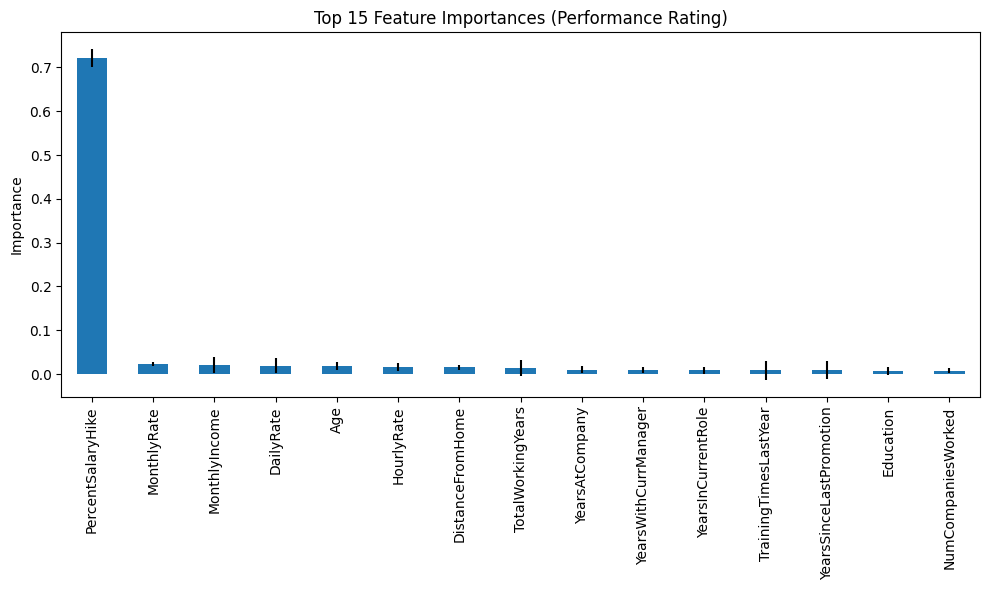


Top 15 Feature Model Evaluation:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       249
           4       1.00      1.00      1.00        45

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
AUC-ROC: 1.0
Confusion Matrix:
 [[249   0]
 [  0  45]]


In [18]:
#DROPPING MISSING VALUES
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

#TRAIN-TEST SPLIT
xtrain, xtest, ytrain, ytest = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

#SCALING
scaler = MinMaxScaler()
xtrain_scaled = pd.DataFrame(scaler.fit_transform(xtrain), columns=xtrain.columns)
xtest_scaled = pd.DataFrame(scaler.transform(xtest), columns=xtest.columns)

#TRAIN INITIAL RANDOM FOREST MODEL
rf_initial = RandomForestClassifier(random_state=42)
rf_initial.fit(xtrain_scaled, ytrain)

#TRAINING RANDOM FOREST TO GET TOP 15 FEATURES
importances = rf_initial.feature_importances_
forest_importances = pd.Series(importances, index=X_clean.columns)
top15_features = forest_importances.sort_values(ascending=False).head(15).index.tolist()

print("\nTop 15 important features:")
print(top15_features)

std = np.std([tree.feature_importances_ for tree in rf_initial.estimators_], axis=0)
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances[top15_features].plot.bar(yerr=std[:15], ax=ax)
ax.set_title("Top 15 Feature Importances (Performance Rating)")
ax.set_ylabel("Importance")
plt.tight_layout()
plt.show()

#TRAINING AND EVALUATING RANDOM FOREST USING ONLY TOP 15 FEATURES
xtrain_top15 = xtrain_scaled[top15_features]
xtest_top15 = xtest_scaled[top15_features]

rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(xtrain_top15, ytrain)

y_pred_top = rf_top.predict(xtest_top15)

print("\nTop 15 Feature Model Evaluation:")
print(classification_report(ytest, y_pred_top))
print('Accuracy:', accuracy_score(ytest, y_pred_top))
print('F1 Score:', f1_score(ytest, y_pred_top, average='weighted'))
print('Precision:', precision_score(ytest, y_pred_top, average='weighted'))
print('Recall:', recall_score(ytest, y_pred_top, average='weighted'))
y_proba_positive_class = rf_top.predict_proba(xtest_top15)[:, 1]
print('AUC-ROC:', roc_auc_score(ytest, y_proba_positive_class))
print('Confusion Matrix:\n', confusion_matrix(ytest, y_pred_top))

CROSS VALIDATION

In [19]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_cv, xtrain_top15, ytrain, cv=cv, scoring='f1_weighted')
print("Cross-validated F1 (weighted) scores:", scores)
print("Mean CV F1 Score:", scores.mean())

from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
cv_results = cross_validate(rf_cv, xtrain_top15, ytrain, cv=cv, scoring=scoring)
print("Cross-Validation Results (Random Forest):")
for metric in scoring:
  print(f"{metric}: {np.mean(cv_results['test_' + metric]):.4f}")

Cross-validated F1 (weighted) scores: [1. 1. 1. 1. 1.]
Mean CV F1 Score: 1.0
Cross-Validation Results (Random Forest):
accuracy: 1.0000
f1_weighted: 1.0000
precision_weighted: 1.0000
recall_weighted: 1.0000


COMPARING WITH OTHER MODELS

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

xtrain_top15 = xtrain_scaled[top15_features]
xtest_top15 = xtest_scaled[top15_features]

def evaluate_model(model, name):
  model.fit(xtrain_top15, ytrain)
  y_pred = model.predict(xtest_top15)

  print(f"\n{name} Evaluation:")
  print(classification_report(ytest, y_pred))
  print("Accuracy:", accuracy_score(ytest, y_pred))
  print("F1 Score (weighted):", f1_score(ytest, y_pred, average='weighted'))
  print("Precision (weighted):", precision_score(ytest, y_pred, average='weighted'))
  print("Recall (weighted):", recall_score(ytest, y_pred, average='weighted'))
  try:
      y_proba = model.predict_proba(xtest_top15)[:, 1]
      print("AUC-ROC:", roc_auc_score(ytest, y_proba))
  except:
      print("AUC-ROC: Not available (model does not support probability prediction)")
  print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))

evaluate_model(LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression")
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")
evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")
evaluate_model(SVC(probability=True, random_state=42), "Support Vector Machine")


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           3       0.97      1.00      0.98       249
           4       1.00      0.80      0.89        45

    accuracy                           0.97       294
   macro avg       0.98      0.90      0.94       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9693877551020408
F1 Score (weighted): 0.9679587811455943
Precision (weighted): 0.9704556241101093
Recall (weighted): 0.9693877551020408
AUC-ROC: 1.0
Confusion Matrix:
 [[249   0]
 [  9  36]]

Decision Tree Evaluation:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       249
           4       1.00      1.00      1.00        45

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

Accuracy: 1.0
F1 Score (weighted): 1.0
Precision (weighted): 1.0
Recall (weighted):

TRIAL 2: WITH UNDERSAMPLING


Class distribution after undersampling (y_resampled):
PerformanceRating
3    181
4    181
Name: count, dtype: int64

Top 15 important features:
['PercentSalaryHike', 'HourlyRate', 'MonthlyRate', 'DailyRate', 'MonthlyIncome', 'YearsWithCurrManager', 'Age', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome', 'Education', 'YearsSinceLastPromotion', 'WorkLifeBalance', 'TrainingTimesLastYear', 'NumCompaniesWorked']


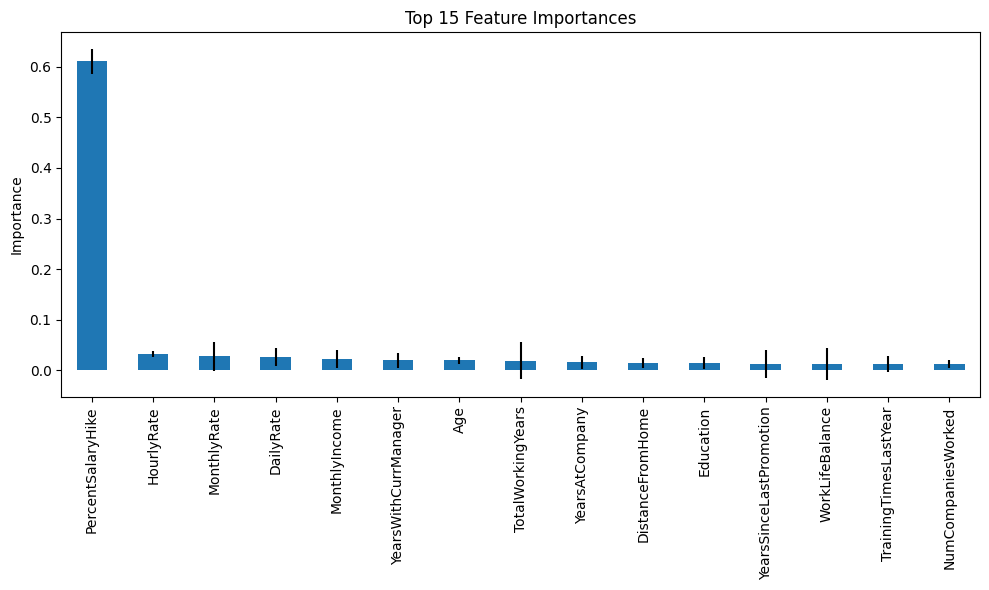


Top 15 Feature Model Evaluation:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       249
           4       1.00      1.00      1.00        45

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
AUC-ROC: 1.0
Confusion Matrix:
 [[249   0]
 [  0  45]]


In [36]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

xtrain, xtest, ytrain, ytest = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(xtrain, ytrain)

print("\nClass distribution after undersampling (y_resampled):")
print(y_resampled.value_counts())

scaler_temp = MinMaxScaler()
xtrain_scaled_all = pd.DataFrame(scaler_temp.fit_transform(X_resampled), columns=xtrain.columns)
xtest_scaled_all = pd.DataFrame(scaler_temp.transform(xtest), columns=xtest.columns)

rf_initial = RandomForestClassifier(random_state=42)
rf_initial.fit(xtrain_scaled_all, y_resampled)

importances = rf_initial.feature_importances_
forest_importances = pd.Series(importances, index=xtrain.columns)
top15_features = forest_importances.sort_values(ascending=False).head(15).index.tolist()

print("\nTop 15 important features:")
print(top15_features)

std = np.std([tree.feature_importances_ for tree in rf_initial.estimators_], axis=0)
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances[top15_features].plot.bar(yerr=std[:15], ax=ax)
ax.set_title("Top 15 Feature Importances")
ax.set_ylabel("Importance")
plt.tight_layout()
plt.show()

scaler_top15 = MinMaxScaler()
xtrain_top15 = pd.DataFrame(scaler_top15.fit_transform(X_resampled[top15_features]), columns=top15_features)
xtest_top15 = pd.DataFrame(scaler_top15.transform(xtest[top15_features]), columns=top15_features)

rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(xtrain_top15, y_resampled)
y_pred_top = rf_top.predict(xtest_top15)

print("\nTop 15 Feature Model Evaluation:")
print(classification_report(ytest, y_pred_top))
print('Accuracy:', accuracy_score(ytest, y_pred_top))
print('F1 Score:', f1_score(ytest, y_pred_top, average='weighted'))
print('Precision:', precision_score(ytest, y_pred_top, average='weighted'))
print('Recall:', recall_score(ytest, y_pred_top, average='weighted'))

y_proba_class4 = rf_top.predict_proba(xtest_top15)[:, 1]
print('AUC-ROC:', roc_auc_score(ytest, y_proba_class4))

print('Confusion Matrix:\n', confusion_matrix(ytest, y_pred_top))

CROSS VALIDATION

In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_top_cv = RandomForestClassifier(random_state=42)

accuracy_scores = cross_val_score(rf_top_cv, xtrain_top15, y_resampled, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(rf_top_cv, xtrain_top15, y_resampled, cv=cv, scoring='f1_weighted')
precision_scores = cross_val_score(rf_top_cv, xtrain_top15, y_resampled, cv=cv, scoring='precision_weighted')
recall_scores = cross_val_score(rf_top_cv, xtrain_top15, y_resampled, cv=cv, scoring='recall_weighted')

print("\nCross-Validation Results (on Resampled Train Set):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")


Cross-Validation Results (on Resampled Train Set):
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


COMPARING WITH OTHER MODELS

In [35]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

models = {"Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
"Support Vector Machine": SVC(probability=True, random_state=42),
"Decision Tree": DecisionTreeClassifier(random_state=42),
"K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)}

def evaluate_model(model, name):
  model.fit(xtrain_top15, y_resampled)
  y_pred = model.predict(xtest_top15)
  print(f"\n{name} Evaluation:")
  print(classification_report(ytest, y_pred))
  print('Accuracy:', accuracy_score(ytest, y_pred))
  print('F1 Score:', f1_score(ytest, y_pred, average='weighted'))
  print('Precision:', precision_score(ytest, y_pred, average='weighted'))
  print('Recall:', recall_score(ytest, y_pred, average='weighted'))

  try:
    y_proba_class4 = model.predict_proba(xtest_top15)[:, 1]
    print('AUC-ROC:', roc_auc_score(ytest, y_proba_class4))
  except:
    print('AUC-ROC: Not available (model does not support probability prediction)')

  print('Confusion Matrix:\n', confusion_matrix(ytest, y_pred))

for model_name, model in models.items():
    evaluate_model(model, model_name)


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           3       1.00      0.92      0.96       249
           4       0.70      1.00      0.83        45

    accuracy                           0.94       294
   macro avg       0.85      0.96      0.89       294
weighted avg       0.95      0.94      0.94       294

Accuracy: 0.935374149659864
F1 Score: 0.9397249543551498
Precision: 0.9545599489795918
Recall: 0.935374149659864
AUC-ROC: 0.9962516733601071
Confusion Matrix:
 [[230  19]
 [  0  45]]

Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           3       1.00      0.91      0.95       249
           4       0.67      1.00      0.80        45

    accuracy                           0.93       294
   macro avg       0.84      0.96      0.88       294
weighted avg       0.95      0.93      0.93       294

Accuracy: 0.9251700680272109
F1 Score: 0.9307901732121421
Precision: 0.9497410904660373
Recall

SAVING UNDERSAMPLING RANDOM FOREST MODEL, SCALER ,TOP 15 FEATURES

In [37]:
import joblib
joblib.dump(rf_top, "performance_rf_model.pkl")
joblib.dump(scaler_top15, "performance_scaler.pkl")
joblib.dump(top15_features, "performance_top15_features.pkl")

['performance_top15_features.pkl']

STREAMLIT

In [38]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


In [51]:
%%writefile performance_rating_app.py
import streamlit as st
import pandas as pd
import joblib

st.set_page_config(page_title="🌟 Performance Rating Predictor", layout="centered")

import base64

def get_base64_image(image_path):
    with open(image_path, "rb") as img_file:
        b64_string = base64.b64encode(img_file.read()).decode()
    return f"data:image/jpeg;base64,{b64_string}"

background_image_url = get_base64_image("performance-rating-1200x480.jpg")

st.markdown(f"""<style>
.stApp {{background: linear-gradient(rgba(255,255,255,0.65), rgba(255,255,255,0.65)), url("{background_image_url}"); background-size: cover; background-repeat: no-repeat; background-position: center; background-attachment: fixed;}}
.main > div {{background-color: rgba(255, 255, 255, 0.95); padding: 2rem; border-radius: 16px; box-shadow: 0 4px 20px rgba(0, 0, 0, 0.25);}}
h1 {{color: #222222 !important; font-size: 2.4rem !important; font-weight: 800 !important; text-align: center; margin-bottom: 1rem;}}
.stMarkdown p {{font-size: 18px !important; font-weight: 700 !important; color: #000000 !important; text-align: center; margin-bottom: 2rem;}}
label, .stSelectbox label, .stSlider label, .stNumberInput label {{font-weight: 900 !important; color: #111111 !important; font-size: 17px !important;}}
.stButton button {{background-color: #ff4b4b; color: white; font-weight: bold; padding: 0.5rem 1.2rem; font-size: 16px; border-radius: 10px; transition: background-color 0.3s ease;}}
.stButton button:hover {{background-color: #d63a3a;}}</style>""", unsafe_allow_html=True)

# Load the model and other objects
model = joblib.load("performance_rf_model.pkl")
scaler = joblib.load("performance_scaler.pkl")
top15_features = joblib.load("performance_top15_features.pkl")

st.title("📈 Employee Performance Rating Predictor")
st.markdown("Predict whether an employee is likely to receive a performance rating of 3 or 4.", unsafe_allow_html=True)

with st.form("performance_form"):
  st.markdown("### 🧾 <span style='color:#4b91ff'>Employee Details</span>", unsafe_allow_html=True)

  PercentSalaryHike = st.slider("💸 Percent Salary Hike", 0, 100, 15)
  HourlyRate = st.slider("⏰ Hourly Rate", 30, 100, 50)
  MonthlyIncome = st.number_input("💰 Monthly Income", min_value=1000, max_value=20000, value=5000)
  DailyRate = st.number_input("📊 Daily Rate", min_value=100, max_value=1500, value=800)
  MonthlyRate = st.number_input("📈 Monthly Rate", min_value=1000, max_value=30000, value=10000)
  Age = st.slider("🎂 Age", 18, 60, 30)
  TotalWorkingYears = st.slider("📅 Total Working Years", 0, 40, 10)
  DistanceFromHome = st.slider("🚗 Distance From Home (km)", 0, 50, 10)
  YearsAtCompany = st.slider("🏢 Years at Company", 0, 40, 5)
  YearsWithCurrManager = st.slider("👔 Years with Current Manager", 0, 20, 5)
  NumCompaniesWorked = st.slider("🏢 Number of Companies Worked", 0, 10, 2)
  YearsSinceLastPromotion = st.slider("📉 Years Since Last Promotion", 0, 15, 3)
  WorkLifeBalance = st.selectbox("🏖️ Work-Life Balance", [1, 2, 3, 4], index=2)  # Assuming 1-4 scale
  Education = st.selectbox("🎓 Education Level", [1, 2, 3, 4], index=2)  # Assuming 1-4 scale
  TrainingTimesLastYear = st.slider("📚 Trainings Attended Last Year", 0, 10, 2)

  submit = st.form_submit_button("🔍 Predict Performance")

if submit:
  input_dict = {"PercentSalaryHike": PercentSalaryHike,
      "HourlyRate": HourlyRate,
      "MonthlyIncome": MonthlyIncome,
      "DailyRate": DailyRate,
      "MonthlyRate": MonthlyRate,
      "Age": Age,
      "TotalWorkingYears": TotalWorkingYears,
      "DistanceFromHome": DistanceFromHome,
      "YearsAtCompany": YearsAtCompany,
      "YearsWithCurrManager": YearsWithCurrManager,
      "NumCompaniesWorked": NumCompaniesWorked,
      "YearsSinceLastPromotion": YearsSinceLastPromotion,
      "WorkLifeBalance": WorkLifeBalance,
      "Education": Education,
      "TrainingTimesLastYear": TrainingTimesLastYear}

  input_df = pd.DataFrame([input_dict])
  input_df = input_df[top15_features]
  input_scaled = pd.DataFrame(scaler.transform(input_df), columns=top15_features)
  prediction = model.predict(input_scaled)[0]

  st.markdown("---")
  if prediction == 4:
      st.markdown("<div class='result-box' style='background-color:#e6ffed; color:#006600;'>✅ <b>Prediction:</b> The employee is likely to receive a <u>Performance Rating of 4</u>.</div>", unsafe_allow_html=True)
  else:
      st.markdown("<div class='result-box' style='background-color:#fff7e6; color:#cc7a00;'>ℹ️ <b>Prediction:</b> The employee is likely to receive a <u>Performance Rating of 3</u>.</div>", unsafe_allow_html=True)



Overwriting performance_rating_app.py


In [43]:
!pip install streamlit pyngrok --quiet
!ngrok authtoken 2tI38eREv66ZaZyqn9M3e7VrkhK_4ytUHi3iFwZnHY7QVDj5j

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [52]:
import os
import time
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"Streamlit is running at: {public_url}")

!streamlit run performance_rating_app.py --server.port 8501 --server.headless true &

time.sleep(3)

Streamlit is running at: NgrokTunnel: "https://13a5-104-199-169-188.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.169.188:8501

  Stopping...
